<h1 align="center"> Challenge de Machine Learning - Fares Zenaidi </h1>
<h2 align="center"><font color="#FF0000"> Prédiction du genre d'une personne à partir de sa photo </font></h2>

#### Import des packages

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from collections import Counter
from time import time

<h2><font color="#00008B"> Chargement des données </font></h2>

In [16]:
# Données d'apprentissage (Training set)
X_train = pd.read_csv('training_templates.csv', sep=',', header=None)
y_train = np.loadtxt('training_labels.txt', dtype=np.int)

# Shuffling des données d'apprentissage
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Données de test (Testing set)
X_test  = pd.read_csv('testing_templates.csv',  sep=',', header=None)

<h2><font color="#00008B"> Exploration des données </font></h2>

In [17]:
# Format des données
print("Format des données d'apprentissage: {}".format(X_train.shape))
print("Format des données de test: {}".format(X_test.shape))

Format des données d'apprentissage: (105600, 128)
Format des données de test: (8496, 128)


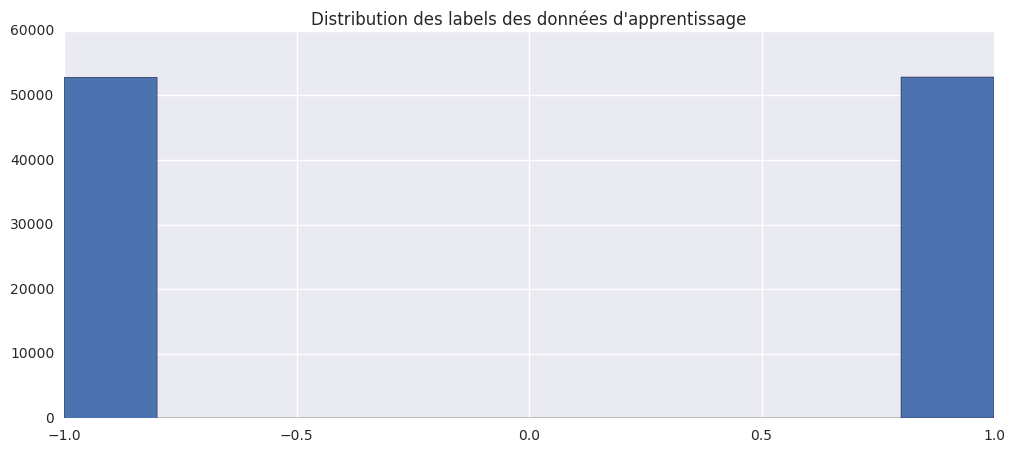

In [18]:
# Distribution de y_train 
fig = plt.figure(figsize=(12, 5))
plt.hist(y_train)
plt.title("Distribution des labels des données d'apprentissage")
plt.show()

#### Nous observons que les données d'apprentissage sont parfaitement équilibrées. Il y a le même nombre de photos d'hommes et de femmes.

### Différentes statistiques des données d'apprentissage

In [19]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,...,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000,105600.000000
mean,0.002530,0.009891,0.003773,-0.001822,-0.005840,0.006133,-0.001196,0.000269,0.003189,0.027155,...,-0.007751,0.000872,0.013127,0.004349,-0.008010,-0.009650,-0.004151,0.018330,0.003536,0.011311
std,0.088575,0.088537,0.085500,0.088032,0.088861,0.087878,0.087473,0.087020,0.088854,0.087430,...,0.088984,0.086749,0.089278,0.087563,0.089629,0.086063,0.086820,0.086243,0.087852,0.087984
min,-0.374050,-0.343089,-0.370593,-0.350701,-0.372002,-0.362833,-0.346995,-0.356012,-0.360777,-0.382042,...,-0.389960,-0.427322,-0.335887,-0.363706,-0.364123,-0.342469,-0.345809,-0.342626,-0.328322,-0.337600
25%,-0.057137,-0.050926,-0.054950,-0.062391,-0.066306,-0.053921,-0.061468,-0.059135,-0.057454,-0.032391,...,-0.067861,-0.058948,-0.047982,-0.054972,-0.069366,-0.068553,-0.064037,-0.040636,-0.056550,-0.048836
50%,0.002770,0.010483,0.002933,-0.002886,-0.005265,0.006131,-0.001636,0.000509,0.003147,0.028051,...,-0.007069,0.000445,0.013359,0.005009,-0.007677,-0.010149,-0.005142,0.017391,0.004375,0.012039
75%,0.062636,0.071121,0.061925,0.057764,0.055694,0.066336,0.057812,0.060063,0.063074,0.087598,...,0.053417,0.059779,0.074721,0.064479,0.053816,0.049220,0.054491,0.077035,0.063698,0.072093
max,0.372737,0.365854,0.354075,0.336738,0.383177,0.383389,0.376780,0.349109,0.332908,0.404551,...,0.348946,0.378057,0.350320,0.324484,0.330347,0.374871,0.372385,0.365373,0.386366,0.351534


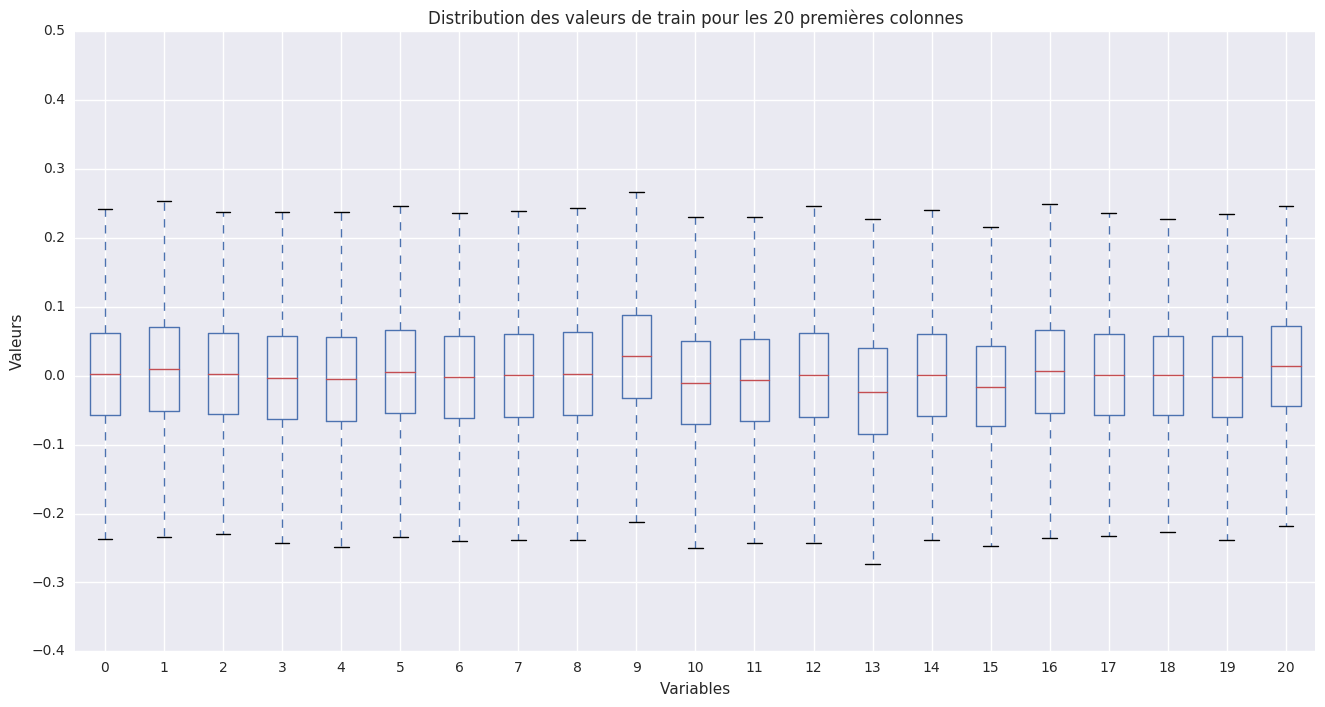

In [20]:
fig = plt.figure(figsize=(16, 8))
X_train.iloc[:, 0:21].boxplot()
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.title("Distribution des valeurs de train pour les 20 premières colonnes")
plt.show()

#### Les données d'apprentissage sont approximativement centrées autour de 0 (avec des valeurs minimales autour de -0.37 et maximales autour de 0.37).

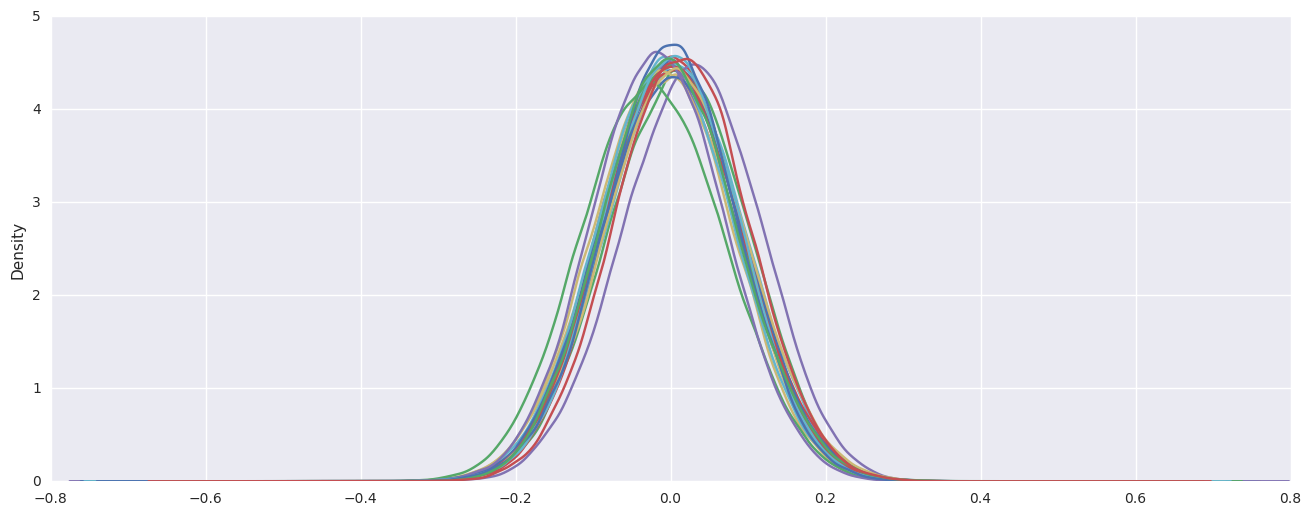

In [21]:
X_train.iloc[:, 0:21].plot.density(figsize=(16, 6), legend=False)

#### Nous observons  que les données d'apprenstissage pour chaque colonne sont distribuées selon une guaussienne centrée autour de 0.

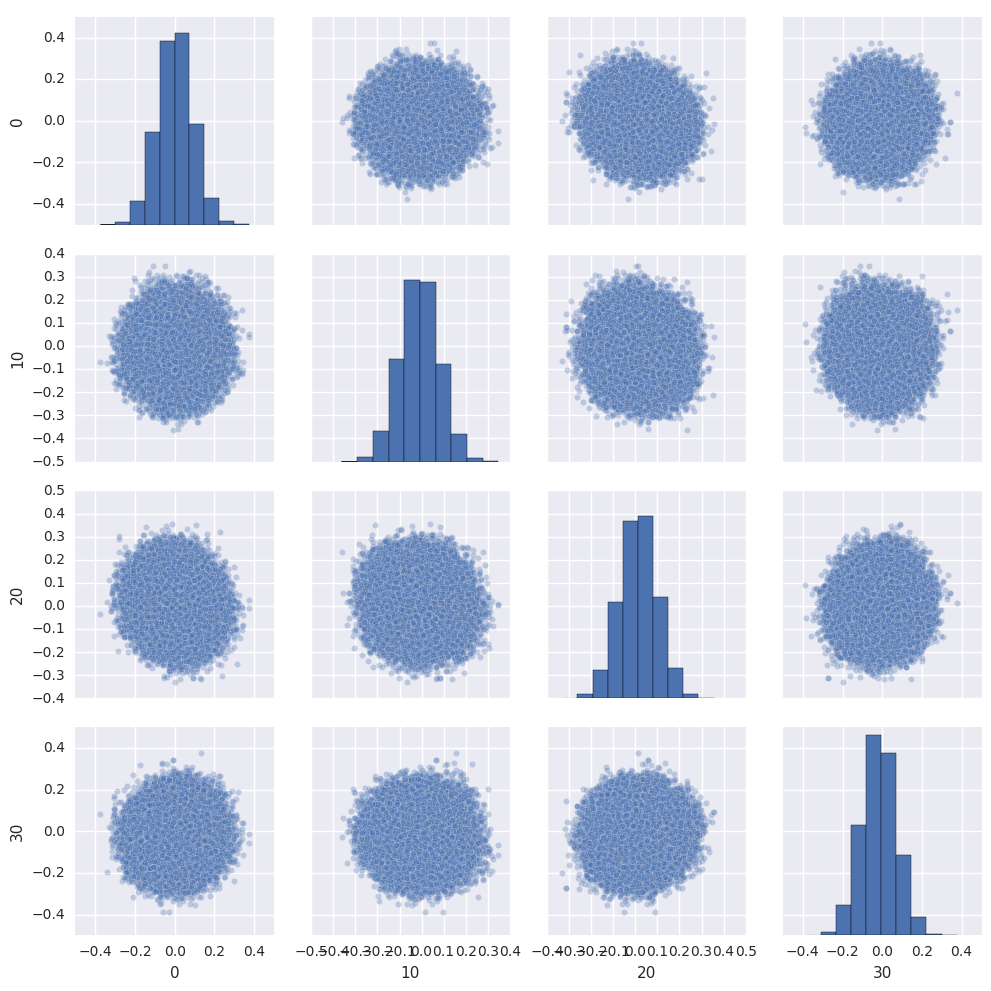

In [22]:
df_merged_data = X_train[[0, 10, 20, 30]]
sns.pairplot(df_merged_data, plot_kws=dict(alpha=0.3))

In [23]:
print("Le nombre de données manquantes (NaN) pour les ensembles d'apprentissage et de test est égale à: {}"
      .format(np.sum(X_train.isnull().values.ravel()) + np.sum(X_test.isnull().values.ravel())))

Le nombre de données manquantes (NaN) pour les ensembles d'apprentissage et de test est égale à: 0


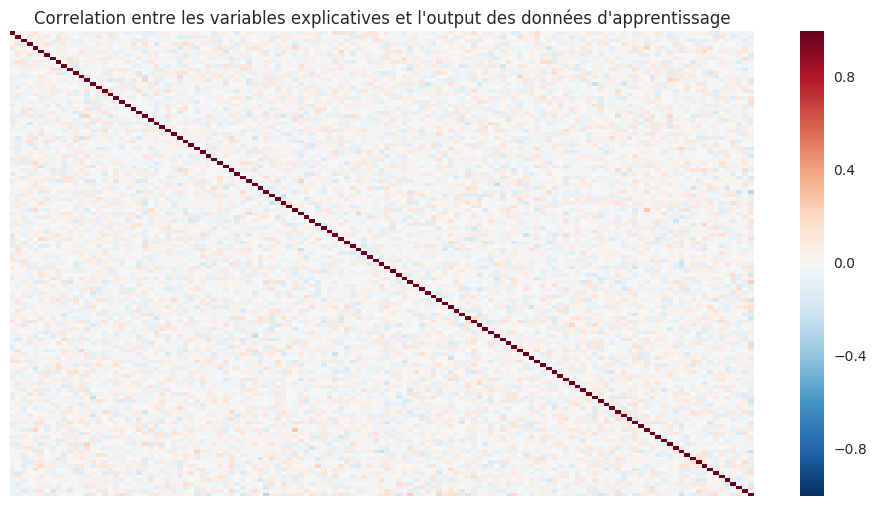

In [24]:
X_y_train = np.concatenate((X_train.values, y_train.reshape(-1, 1)), axis=1)
X_y_train_corr = pd.DataFrame(X_y_train).corr()

plt.figure(figsize=(12, 6))
sns.heatmap(X_y_train_corr, xticklabels=False, yticklabels=False)
plt.title('Correlation entre les variables explicatives et l\'output des données d\'apprentissage')
plt.show()

#### On remarque que les variables explicatives ne sont pas corrélées entre elles. De plus, il n'y pas de correlation entre chacune des variables explicatives et l'output.

<h2><font color="#00008B"> Application des modèles de Machine Learning </font></h2>

#### Centrage et réduction des données

In [25]:
# Fonction qui permet de centrer de réduires les données d'apprentissage et de test
def centrage_reduction(X_train, X_test):
    X_train_norm = StandardScaler().fit_transform(X_train)
    X_test_norm = StandardScaler().fit_transform(X_test)
    return X_train_norm, X_test_norm

### Clustering des données 

#### Clustering des données d'apprentissage

In [26]:
# Clustering des donées d'apprentissage (en 100 clusters différents)
kmeans = KMeans(n_clusters=100).fit(X_train)

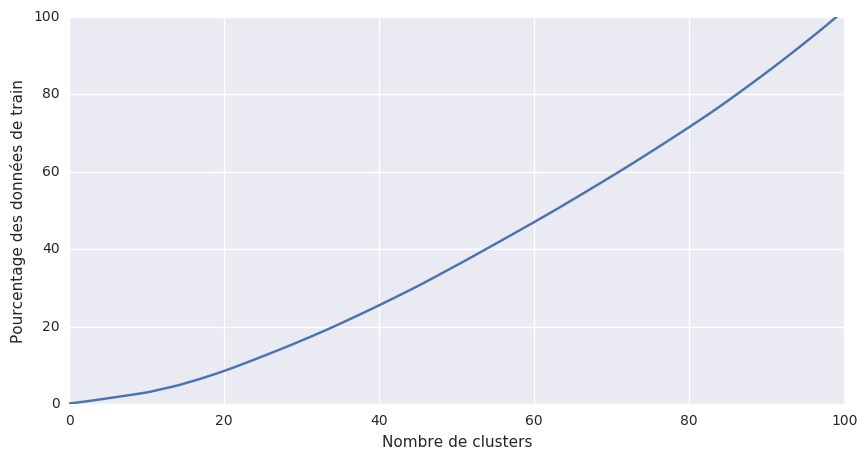

In [27]:
# Training labels 
X_train_labels = kmeans.labels_
X_train_centers = kmeans.cluster_centers_

# Nombre des données de train dans chaque cluster
X_train_repartition = np.array(list(Counter(X_train_labels).values()))

# Pourcentage des données de train dans chaque cluster
X_train_repartition_per = X_train_repartition / np.shape(X_train[0]) * 100

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(np.sort(X_train_repartition_per)))
plt.xlabel("Nombre de clusters")
plt.ylabel("Pourcentage des données de train")
plt.show()

#### Clustering des données de test

In [28]:
# Clustering des données de test (assigne chaque sample à un des 100 clusters générés précédemment)
X_test_labels = kmeans.predict(X_test)

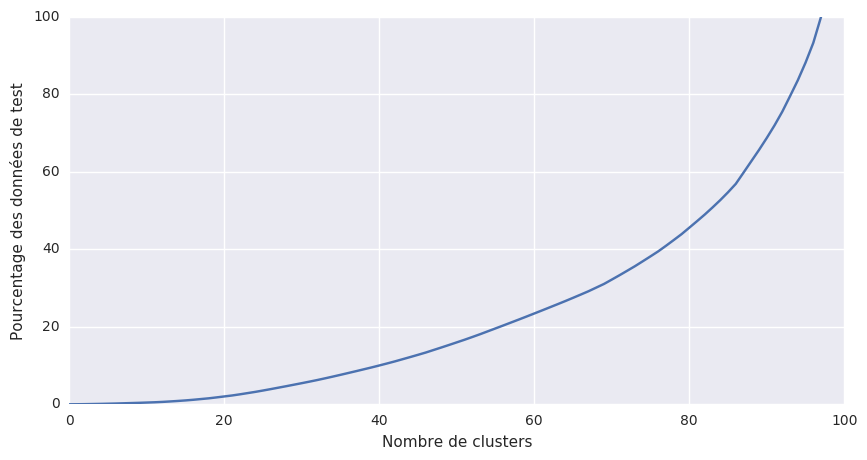

In [29]:
# Nombre des données de test dans chaque cluster
X_test_repartition = np.array(list(Counter(X_test_labels).values()))

# Pourcentage des données de test dans chaque cluster
X_test_repartition_per = X_test_repartition / np.shape(X_test[0]) * 100

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(np.sort(X_test_repartition_per)))
plt.xlabel("Nombre de clusters")
plt.ylabel("Pourcentage des données de test")
plt.show()

#### Détermine le nombre de clusters qui contient au moins 92% des données de test

In [30]:
def number_of_relevent_clusters(X_test_repartition_per, percentage_data):
    counter = 0
    for i in range(X_test_repartition_per.shape[0]):
        counter += X_test_repartition_per[X_test_repartition_per.shape[0] - i - 1]
        if (counter >= percentage_data):
            break 
    return i

In [31]:
percentage_data = 96
nb_relevent_clusters = number_of_relevent_clusters(np.sort(X_test_repartition_per), percentage_data)

In [32]:
# Most relevent clusters
most_relevent_clusters = np.argsort(X_test_repartition_per)[-nb_relevent_clusters:]
print("Ces clusters contiennent {}% des données d'apprentissage".format(int(np.sum(X_train_repartition_per[most_relevent_clusters]))))
print("Ces clusters contiennet {}% des données de test".format(int(np.sum(X_test_repartition_per[most_relevent_clusters]))))

Ces clusters contiennent 71% des données d'apprentissage
Ces clusters contiennet 95% des données de test


#### Filtrage des données d'apprentissage

In [33]:
# J'ai décidé de filtrer et ne garder que les données d'apprentissage qui se rapprochent le plus de l'échantillon de test.
# Selection des lignes de X_train et y_train qui appartiennent aux most_relevent_clusters.
rel_X_train_lines = [index for index in range(X_train.shape[0]) if X_train_labels[index] in most_relevent_clusters]
rel_X_train_lines = np.array(rel_X_train_lines) 

X_train = X_train.values
X_train = X_train[rel_X_train_lines]
y_train = y_train[rel_X_train_lines]

In [36]:
#### Split des données d'apprentissage en un ensemble de train et de validation

In [37]:
# Stratégie de split: 90-10
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size=0.1)

### Modèles de classification

Approche
- Implémenter plusieurs algorithmes de classification séparemment.
- Déterminer les hyper-paramètres optimaux à l'aide d'une Grid Search.
- Déterminer les thresholds optimaux de probabilité pour les hommes et les femmes sur les données de validation.
- Evaluer le score sur les données de validation à l'aide de la fonction de scoring définie dans l'énoncé.

In [38]:
# Fonction qui fit différents modèles de classification aux données de train. 
# On determine les hyper-paramètres optimaux de chacun des modèles implémentés à l'aide d'une Grid Search. 

def optimal_classifier(algorithm):
    # Logistic Regression
    if algorithm == 0:  
        classifier = LogisticRegression()
        classifier.fit(X1_train, y1_train)
    
    # ExtraTrees
    if algorithm == 1:  
        extra_tree = ExtraTreesClassifier(n_jobs=-1, criterion='gini', bootstrap=True, oob_score=True) 
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 30]}
        cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2)
        classifier = GridSearchCV(estimator=extra_tree, cv=cv, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
        classifier.fit(X1_train, y1_train)
        print(classifier.best_estimator_)        
    
    # Multi-Layer Perceptron
    if algorithm == 2: 
        mlperceptron= MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes=(384,), verbose=True, 
                                    max_iter=340,warm_start=True, beta_1=0.99, learning_rate_init=0.001)
        param_grid = {'alpha': [0.00891]}
        classifier = GridSearchCV(mlperceptron, param_grid, cv=3, n_jobs=-1, verbose=1)
        classifier.fit(X1_train, y1_train)
        print("Meilleurs paramètres pour le réseau de neurones")
        print(classifier.best_estimator_)
    
    # kNN 
    if algorithm == 3:
        knn_classifier = KNeighborsClassifier(weights='distance')
        param_grid = {'n_neighbors': [128]}
        classifier = GridSearchCV(knn_classifier, param_grid, cv=3, n_jobs=-1, verbose=1)
        classifier.fit(X1_train, y1_train)
        print("Meilleurs paramètres pour le classifieur kNN")
        print(classifier.best_estimator_)
    
    # SVM avec un kernel rbf
    if algorithm == 4:
        svm = SVC(kernel='rbf', probability=True)
        param_grid = {'C': [10], 'gamma': [1.6, 1.7, 1.75]}  
        classifier = GridSearchCV(svm, param_grid, cv=2, n_jobs=-1, verbose=1)
        classifier.fit(X1_train, y1_train)
        print(classifier.best_estimator_)
    
    return classifier.best_estimator_

Modèle Final

Après avoir essayé plusieurs modèles de classification sur les données d'apprentissage et avoir évalué leurs performances, j'ai décidé d'utiliser un Voting Classifier qui contient un MLP et un kNN. Le fait de combiner ces classifieurs me permet d'améliorer mes scores sur les données de validation et de test.

- MLP ou réseau de neuronnes : réputation d'être une solution robuste pour la classification d'imagse. Dans mon cas, cela m'a permis d'avoir un temps d'execution de l'algorithme assez raisonnable, comparé à un SVM (que j'ai essayé aussi). 
- kNN : obtient des résultats convainquants avec un temps d'execution raisonnable.

In [39]:
# Voting classifier
clf1 = KNeighborsClassifier(n_neighbors=128, weights='distance', p=2)

clf2 = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes=(384,), verbose=True, max_iter=340,
                     warm_start=True, alpha=0.00891, beta_1=0.99)

ens_clf = VotingClassifier(estimators=[('knn', clf1), ('mlp', clf2)], voting='soft', n_jobs=-1)
ens_clf.fit(X1_train, y1_train)

# Enregistre le modèle de VotingClassifier
# joblib.dump(ens_clf, 'ensemble_classifier_1.pkl') 
# To load saved fitted model 
# ens_clf = joblib.load('ensemble_classifier_1.pkl')

Iteration 1, loss = 0.25219395
Iteration 2, loss = 0.10840879
Iteration 3, loss = 0.08661258
Iteration 4, loss = 0.07623903
Iteration 5, loss = 0.07024324
Iteration 6, loss = 0.06538924
Iteration 7, loss = 0.06173106
Iteration 8, loss = 0.05867709
Iteration 9, loss = 0.05592233
Iteration 10, loss = 0.05391681
Iteration 11, loss = 0.05164733
Iteration 12, loss = 0.05017249
Iteration 13, loss = 0.04872619
Iteration 14, loss = 0.04769783
Iteration 15, loss = 0.04623172
Iteration 16, loss = 0.04526157
Iteration 17, loss = 0.04465535
Iteration 18, loss = 0.04352823
Iteration 19, loss = 0.04290078
Iteration 20, loss = 0.04244381
Iteration 21, loss = 0.04182250
Iteration 22, loss = 0.04157707
Iteration 23, loss = 0.04097873
Iteration 24, loss = 0.04057339
Iteration 25, loss = 0.04006814
Iteration 26, loss = 0.04014416
Iteration 27, loss = 0.03943383
Iteration 28, loss = 0.03958932
Iteration 29, loss = 0.03927714
Iteration 30, loss = 0.03887569
Iteration 31, loss = 0.03888309
Iteration 32, los

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=128, p=2,
           weights='distance')), ('mlp', MLPClassifier(activation='relu', alpha=0.00891, batch_size='auto',
       beta_1=0.99, beta_2=0.999, ea...le=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=True))],
         n_jobs=-1, voting='soft', weights=None)

#### Fonction de coût

In [40]:
# Fonction de scoring afin d'évaluer la performance des algorithmes de classification implémentés.
def compute_pred_score(y_true, y_pred):
    y_comp = y_true * y_pred
    score = float(10 * np.sum(y_comp == -1) + np.sum(y_comp == 0))
    score /= y_comp.shape[0]
    return score

#### Fonction qui génère le vecteur de prédiction

In [41]:
# Fonction qui génère le vecteur de prédiction. Elle se base sur la matrice de probabilité (générée à partir de 
# predict_proba) et sur les valeurs de thresholds spécifiques aux hommes et aux femmes. 
def output_from_pred(pred, thresh_F, thresh_H):
    output = np.zeros(pred.shape[0])
    
    ind_F = np.where(pred[:, 0] >= thresh_F)
    ind_H = np.where(pred[:, 1] >= thresh_H)
    
    output[ind_F] = -1
    output[ind_H] = 1
    
    return output 

#### Détermination des thresholds optimaux (qui minisent la fonction de coût des données de validation)

In [54]:
# Fonction qui permet de déterminer les valeus de thresholds des hommes et des femmes. 
# On se base sur les données de validation (X1_test) pour les déterminer. En effet, on détermine les seuils
# qui réalisent un score minimal pour les données de validation.

def optimal_thresholds(classifier, prob_estimates):
    threshold_F = np.arange(0.6, 0.9, 0.005)
    threshold_H = np.arange(0.6, 0.9, 0.005)
    best_score = 1
    best_thresh_F = 0
    best_thresh_H = 0
    # scores = np.zeros(len(threshold_H))
    for thresh_F in threshold_F:
        for thresh_H in threshold_H:
            y1_test_pred = output_from_pred(prob_estimates, thresh_F, thresh_H)
            score = compute_pred_score(y1_test, y1_test_pred)
            print(score)
            if score < best_score:
                best_score = score
                best_thresh_F = thresh_F
                best_thresh_H = thresh_H

    return best_score, best_thresh_F, best_thresh_H


In [46]:
prob_estimates = ens_clf.predict_proba(X1_test)

In [55]:
best_score, best_thresh_F, best_thresh_H = optimal_thresholds(ens_clf, prob_estimates)
print('Score sur le test avec un thresh_F. et un thresh_H. de %s, %s: %s' % (best_score, best_thresh_F, best_thresh_H))

0.11720101104163895
0.1164028202740455
0.11547159771185313
0.11094851669549022
0.11108154849008914
0.10762272183051749
0.10762272183051749
0.1078887854197153
0.10828788080351204
0.10855394439270986
0.10748969003591859
0.10655846747372621
0.10456299055474258
0.1048290541439404
0.10522814952773712
0.10442995876014367
0.10456299055474258
0.10522814952773712
0.10429692696554477
0.1033657044033524
0.10270054543035785
0.10323267260875349
0.10389783158174803
0.1033657044033524
0.10243448184116004
0.10270054543035785
0.1017693228681655
0.1019023546627644
0.10270054543035785
0.10376479978714913
0.10456299055474258
0.10536118132233604
0.10642543567912731
0.10655846747372621
0.1061593720899295
0.1061593720899295
0.10695756285752295
0.10522814952773712
0.10602634029533059
0.10655846747372621
0.10642543567912731
0.10735665824131968
0.10695756285752295
0.10735665824131968
0.10921910336570441
0.11094851669549022
0.11134761207928695
0.1136091525874684
0.11547159771185313
0.11839829719302913
0.11999467

### Prédictions

In [56]:
# Génération des prédictions de l'échantillon de test
y_test_out = output_from_pred(ens_clf.predict_proba(X_test), best_thresh_F, best_thresh_H)  
np.savetxt('y_pred.txt', y_test_out, fmt='%d')